Sentiment analysis with different models:

*   NLTK Library
*   VADER (Valence Aware Dictionary and sentiment Reasoner)
*   Transformers Library (Huggingface) Pipeline

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from google.colab import drive

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projects/course_review.csv')
print(df.shape)
df.head(500)

(107018, 3)


,Id,Review,Label
0,0,good and interesting,5
1,1,"This class is very helpful to me. Currently, I...",5
2,2,like!Prof and TAs are helpful and the discussi...,5
3,3,Easy to follow and includes a lot basic and im...,5
4,4,Really nice teacher!I could got the point eazl...,4
...,...,...,...
495,495,"The instructor does an excellent job, but real...",3
496,496,The course was enjoyable for the most partand ...,4
497,497,This class was inspiring! I't was worth the wa...,5
498,498,Very interesting course. Maybe Fusion 360 may ...,5


In [ ]:
example = df['Review'][50]
print(example)

Great course. I enjoyed learning the material.


NLTK

In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Great', 'course', '.', 'I', 'enjoyed', 'learning', 'the', 'material', '.']

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


[('Great', 'JJ'),
 ('course', 'NN'),
 ('.', '.'),
 ('I', 'PRP'),
 ('enjoyed', 'VBD'),
 ('learning', 'VBG'),
 ('the', 'DT'),
 ('material', 'NN'),
 ('.', '.')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Great/JJ)
  course/NN
  ./.
  I/PRP
  enjoyed/VBD
  learning/VBG
  the/DT
  material/NN
  ./.)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Vader

This uses a "bag of words" approach:


1.   Stop words are removed
2.   each word is scored and combined to a total score.


    


In [ ]:
  sia.polarity_scores('I am so happy!')
  print(sia)
  sia.polarity_scores('This is the worst thing ever.')
  print(sia)
  sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.8126}

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/107018 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
vaders.head()

,Id,neg,neu,pos,compound,Review,Label
0,0,0.0,0.152,0.848,0.6808,good and interesting,5
1,1,0.0,0.866,0.134,0.4754,"This class is very helpful to me. Currently, I...",5
2,2,0.0,0.575,0.425,0.8843,like!Prof and TAs are helpful and the discussi...,5
3,3,0.0,0.701,0.299,0.5719,Easy to follow and includes a lot basic and im...,5
4,4,0.0,0.794,0.206,0.3266,Really nice teacher!I could got the point eazl...,4


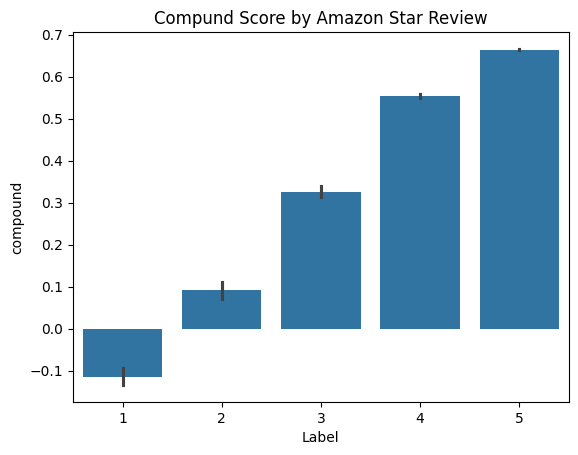

In [ ]:
ax = sns.barplot(data=vaders, x='Label', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

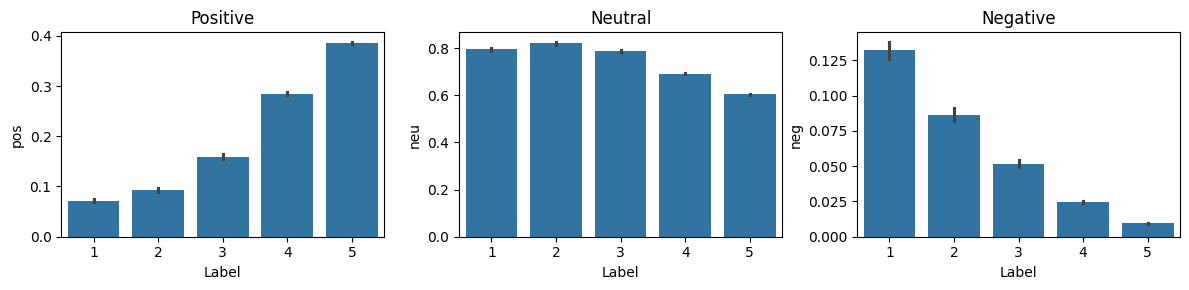

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Label', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Label', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Label', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

BERT

Use a model trained of a large corpus of data.
Transformer model accounts for the words but also the context related to other words.


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.8126}

In [ ]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0030510472, 'roberta_neu': 0.016622834, 'roberta_pos': 0.98032606}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Assuming df is your DataFrame
for index, row in df.iterrows():
    text = str(row['Label'])  # Convert to string
    myid = row['Id']
    vader_result_rena = {}

    try:
        # Use sia.polarity_scores(text) directly for VADER
        vader_result = sia.polarity_scores(text)

        for key, value in vader_result.items():
            vader_result_rena[f"vader_{key}"] = value

        # Assuming polarity_scores_roberta is a function that returns a dictionary
        roberta_result = polarity_scores_roberta(text)

        both = {**vader_result_rena, **roberta_result}
        res[myid] = both

    except RuntimeError:
        print(f'Broke for id {myid}')

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.columns

Index(['Id', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'Review', 'Label'], dtype='object')

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

In [ ]:
sent_pipeline('Great another glorious morning!')

In [ ]:
sent_pipeline('That is state of art')